# 6.1 매개변수 갱신

최적의 매개변수 찾기 = 최적화 (Optimization)

확률적 경사 하강법 (SGD) : 매개 변수의 기울기를 구해, 기울어진 방향으로 매개 변수 값을 갱신하는 일을 반복해서 최적의 매개 변수를 찾는 과정 

## 6.1.2 확률적 경사 하강법 (SGD)

W = W - r미분(L/W) 

W 는 가중치 매개변수 <br>
r 는 학습률<br>
미분(L/W) 는 W 에 대한 손실함수의 기울기 

기울어진 방향으로 일정거리만 가겠다. 


In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]

* lr : learning rate
* update(params, grads) dictinary 변수로 가중치와 기울기를 저장하고 있음 

## 6.1.3 SGD 의 단점 

anisortropy 비등방성 (방향에 따라 성질, 즉 기울기가 달라지는 함수) 에서는 탐색 경로가 비효율 적이다. 

지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리키기 때문이다. 

## 6.1.4 모멘텀
Momentum : 운동량 

v = av - r미분(L/W)
W = W + v

W : 갱신할 가중치 매개변수 <br>
av : 아무런 힘을 받지 않을 때 서서히 하강시킴 (공기저항)<br>
v : 속도 <br>
기울기 방향으로 힘을 받아 물체가 가속됨 


In [2]:
class Momentum:
    def __init__(self, lr = 0.01, momentum =0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]
            

v 는 초기에 아무것도 담지 않음 update 호출 될때 매개변수와 같은 구조로 저장됨 

SGD 에 비하면 지그재그 정도가 덜하다.

## 6.1.5 AdaGrad

학습률 을 정하는 기술 학습률 감소 learning rate decay <br>
학습을 진행하면서 학습률을 점차 줄여가는 방법

AdaGrad 는 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것에서 발전시켜 '각각의' 매개변수에 맞춤형 값을 만들어 주는 방식 

개별 매개변수에 적응적(adative) 학습률을 조정하면서 학습을 진행 

h 라는 변수가 등장하여 기존 기울기 값을 제곱하여 계속 더해주고 매개변수가 갱신할 때 1/루트h 를 곱해 학습률을 조정

매개변수의 원소 중에서 많이 움직인 (크게 갱신된) 원소는 학습률이 낮아지게 됨 

과거의 기울기를 제곱해서 계속 더해가서 학습을 진행할수록 갱신 강도가 약해진다. 학습을 계쏙하면 순간 갱신량이 0이되어 전혀 갱신되지 않게 된다. 이를 개선한 RMSProp 는 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영하는 지수이동평균 Exponential Moving Average 라 하여, 과거 기울기의 반영규모를 기하급수적으로 감소 시킨다. 

In [2]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key]/(np.sqrt(self.h[key])+1e-7)

마지막에 +1e-7 작은 값을 더하는 부분은 self.h[key] 에 0이 담겨 있다해도 0으로 나누는 사태를 막아준다.

y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰복으로 작아지도록 조정된다. y 축 방향으로 갱신 강도가 약해졌고, 지그재그 움직임이 줄어든다. 

## 6.1.6 Adam 

모멘텀 : 공이 그릇을 구르는 듯한 물리 법칙에 따른 움직임 <br>
AdaGrad : 매개변수의 원소마다 적응적으로 갱신정도를 조정 <br>
Adam : 이 두 방법을 융합 하이퍼파라미터의 '편향보정', 모멘텀보다 좌우 흔들림이 작음 (학습의 갱신 강도를 적응적으로 조정)

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


## 6.1.7 어느 갱신 방법을 이용할 것인가?

기법의 결과 비교 - 맞춰서 잘 사용하길.. (주로 SGD, Adam 을 사용함)

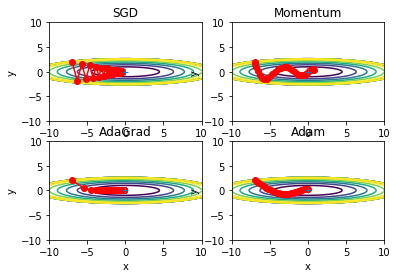

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()


## 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

100 개의 뉴런으로 구성된 5층 신경망에서 ReLU 를 활성화 함수로 사용해 측정 

하이퍼파라미터인 학습률과 신경망의 구조에 따라 결과가 달라진다. 


===========iteration:0===========
SGD:2.32673079114
Momentum:2.541961857
AdaGrad:2.33596171541
Adam:2.21237799895
===========iteration:100===========
SGD:1.40796067202
Momentum:0.343553114649
AdaGrad:0.143096497937
Adam:0.293880162376
===========iteration:200===========
SGD:0.857674675638
Momentum:0.341686438048
AdaGrad:0.157223474874
Adam:0.255719674022
===========iteration:300===========
SGD:0.581429014061
Momentum:0.189020691049
AdaGrad:0.059119337957
Adam:0.081316903573
===========iteration:400===========
SGD:0.518722082448
Momentum:0.212188620669
AdaGrad:0.0784261537893
Adam:0.127169053149
===========iteration:500===========
SGD:0.346217128556
Momentum:0.0752360599955
AdaGrad:0.0425821583738
Adam:0.0473747176021
===========iteration:600===========
SGD:0.457257555255
Momentum:0.169846445333
AdaGrad:0.0683963877931
Adam:0.112104790017
===========iteration:700===========
SGD:0.394990750836
Momentum:0.114310178897
AdaGrad:0.0583674341805
Adam:0.067227826877
===========iteration:800===

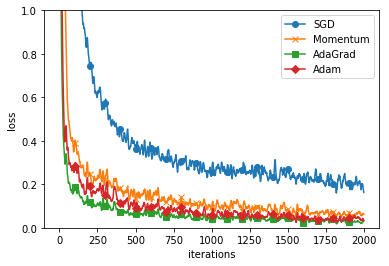

In [2]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


# 6.2 가중치의 초기값

## 6.2.1 초기값=0?

가중치 감소 weight decay (오버피팅을 억제해 범용 성능을 높이는 방법) : 가중치 매개변수의 값이 작아지도록 학습하는 방법, 가중치 값을 작게해 오버피팅이 일어나지 않게함

초기값이 0 인경우 오차역전파법에서 모든 가중치의 값이 똑같이 갱신됨 

가중치가 고르게 되지 않으려면 초깃값을 무작위로 설정해야 함

## 6.2.2 은닉층의 활성화값 분포 

activation fucntion 의 출력 데이터의 분포 확인

가중치 초기값에 따라서 hidden layer 의 활성화 값이 어떻게 변하는지 확인 

시그모이드와 5 layer 에 무작위 입력 데이터를 흘려 각 층의 활성화 값 분포를 histogram 으로 확인 


In [8]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터 편차가1인 정규분포
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

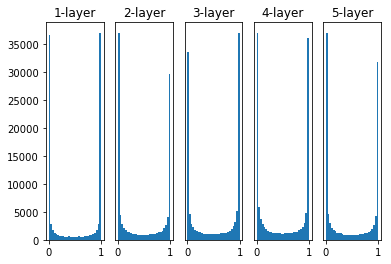

In [2]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 활성화 값들이 0과 1에 치우쳐 분포함 

시그모이드 함수는 출력이 0 또는 1 에 가까우면 미분값이 0 이 됨 

역전파의 기우릭 값이 점점 사라짐 기울기 소실 Gradient Vanishing 

* 표준편차를 0.01 로 한 정규분포의 경우 

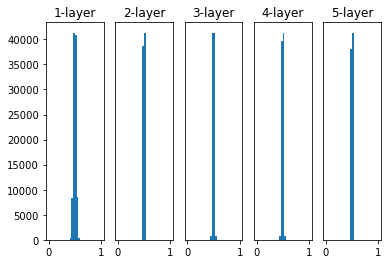

In [3]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

이번에는 0.5 에 집중됨 

이상태는 다수의 뉴런이 거의 같은 값을 가지고 있어 다수의 뉴런을 둔 의미가 없다. <br>
활성화 값들이 치우치면 표현적을 제한한다. (고루분포되야한다.)

* ** Xavier 초깃값 ** : 각 층의 활성화 값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾음<br>
    앞 계층의 노드가 n 개라면 표준편차가 1/루트n 인 분포를 사용 <br>
    앞 층의 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼짐 


In [10]:
node_num = 100 # 앞노드의 개수 가정
w = np.random.randn(node_num, node_num)/np.sqrt(node_num)

In [18]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터 편차가1인 정규분포
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num)/np.sqrt(node_num)

    a = np.dot(x, w)
    z = tanh(a)
    activations[i] = z
    

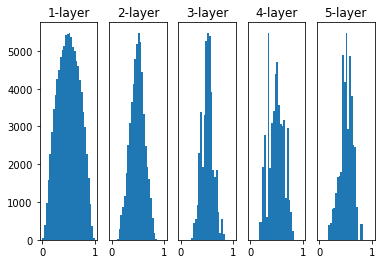

In [13]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

층이 깊어지면서 형태가 좀 일그러지지만 넓게 분포됨 

일그러짐은 tanh 함수(쌍곡선함수) 를 사용하면 개선됨 S 자 모양의 곡선 함수 인데 (0, 0) 에서 대칭인 S 곡선 (sigmoid 는 0, 0.5 에서 대칭)
활성화 함수는 원점에서 대칭인 함수가 좋다. 


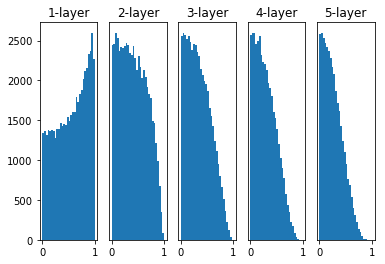

In [19]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 6.2.3 ReLU 를 사용할 때의 가중치 초깃값

Xavier 초깃값은 활성화 함수가 선형인 것을 전체로 <br>
sigmoid, tanh 는 좌우 대칭이라 중앙 부근이 선형이 함수 <br>

ReLU 는 ReLU 에 특화된 초깃값을 이용할 것 

* ** He 초기값 ** : 앞단계 층의 노드가 n개일 때, 표준편차가 루트2/n 인 정규분포 <br>
    ReLU 는 음의 영역이 0 이라서 더 넓게 분포시키기 위해 2개의 개수가 필요
    

0~1 std = 0.01 신경망에 아주 작은 데이터가 흐르는 것 = 역전파 가중치의 기울기가 작아진다. 

* Activation Func -> 초깃값 <br>
    ReLU -> He <br>
    Sigmoid, tanh -> Xavier <br>


## 6.2.4 MNIST 가중치 초깃값 비교


===========iteration:0===========
std=0.01:2.30250803011
Xavier:2.29894124638
He:2.36023651587
===========iteration:100===========
std=0.01:2.30217166353
Xavier:2.25523484404
He:1.59161377374
===========iteration:200===========
std=0.01:2.30200889443
Xavier:2.17217256259
He:0.747561567806
===========iteration:300===========
std=0.01:2.30355187676
Xavier:1.93428136727
He:0.518708379857
===========iteration:400===========
std=0.01:2.30099758602
Xavier:1.53247913089
He:0.477440244072
===========iteration:500===========
std=0.01:2.30397560542
Xavier:1.0545705925
He:0.472712223989
===========iteration:600===========
std=0.01:2.30034598682
Xavier:0.742708158068
He:0.367013061742
===========iteration:700===========
std=0.01:2.3037229021
Xavier:0.577137087434
He:0.28826847248
===========iteration:800===========
std=0.01:2.29654877681
Xavier:0.466922110346
He:0.23436540203
===========iteration:900===========
std=0.01:2.30261116382
Xavier:0.471538030473
He:0.292744530389
===========iteration:100

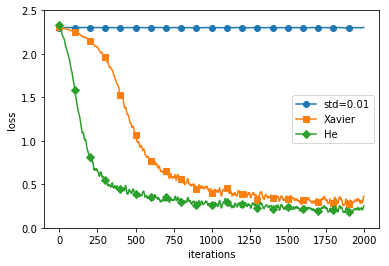

In [20]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


뉴런수가 100개인 5층 신경망에서 활성화 함수로 ReLU 사용 

std=0.01 일때 학습이 전혀 되지 않음 (순전파에 너무 작은 값 떄문에 역전파 기울기도 작아져 가중치가 거의 갱신되지 않음)

# 6.3 배치 정규화 

각 층이 활성화를 적당히 퍼트리도록 강제함 <br>
각 층에서의 활성화 값이 적당히 분포되도록 조정 

## 6.3.1 배치 정규화 알고리즘 

* 장점
    - 학습이 빠름
    - 초깃값에 의존하지 않음 
    - 오버피팅을 억제
    
데이터 분포가 평균 0, 분산이 1이 되도록 정규화 함 

미니배치 m 개의 입력 데이터의 집합에 대해 평균 u 와 분산 a^2 를 구하고 입력 데이터를 평균이 0, 분산이 1이 되게 정규화 시킴<br>
엡실론 e 를 이용해 작은값 (0에 가까운) 0 으로 나누는 사태를 예방

활성화 함수 앞 (또는 뒤) 에 삽입 

배치 정규화 계층마다 정규화된 데이터에 고유한 확대 Scale, 이동 Shift 변환을 수행 

## 6.3.2 배치 정규화 효과 

학습 진도가 배치 정규화 여부에 따라 어떻게 달라지는지 확인 


* 초깃값 분포를 다양하게 줘서 학습을 진행 (표준편차 변경) 

초기값에 상관없이 학습이 빠르게 진행됨 

============== 1/16 ==============
epoch:0 | 0.097 - 0.08


C:\Users\jhee\Documents\GitRepositories\StudyML\DeepLearningFromScratch\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
C:\Users\jhee\Documents\GitRepositories\StudyML\DeepLearningFromScratch\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\jhee\Documents\GitRepositories\StudyML\DeepLearningFromScratch\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\jhee\Documents\GitRepositories\StudyML\DeepLearningFromScratch\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
C:\Users\jhee\Documents\GitRepositories\StudyML\DeepLearningFromScratch\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  sel

epoch:1 | 0.097 - 0.111
epoch:2 | 0.097 - 0.147
epoch:3 | 0.097 - 0.161
epoch:4 | 0.097 - 0.175
epoch:5 | 0.097 - 0.185
epoch:6 | 0.097 - 0.212
epoch:7 | 0.097 - 0.227
epoch:8 | 0.097 - 0.238
epoch:9 | 0.097 - 0.253
epoch:10 | 0.097 - 0.273
epoch:11 | 0.097 - 0.286
epoch:12 | 0.097 - 0.303
epoch:13 | 0.097 - 0.319
epoch:14 | 0.097 - 0.338
epoch:15 | 0.097 - 0.363
epoch:16 | 0.097 - 0.382
epoch:17 | 0.097 - 0.387
epoch:18 | 0.097 - 0.411
epoch:19 | 0.097 - 0.421
============== 2/16 ==============
epoch:0 | 0.117 - 0.08


C:\Users\jhee\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


epoch:1 | 0.097 - 0.064
epoch:2 | 0.097 - 0.115
epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.174
epoch:5 | 0.097 - 0.205
epoch:6 | 0.097 - 0.222
epoch:7 | 0.097 - 0.245
epoch:8 | 0.097 - 0.277
epoch:9 | 0.097 - 0.298
epoch:10 | 0.097 - 0.331
epoch:11 | 0.097 - 0.347
epoch:12 | 0.097 - 0.376
epoch:13 | 0.097 - 0.398
epoch:14 | 0.097 - 0.408
epoch:15 | 0.097 - 0.427
epoch:16 | 0.097 - 0.44
epoch:17 | 0.097 - 0.466
epoch:18 | 0.097 - 0.474
epoch:19 | 0.097 - 0.492
============== 3/16 ==============
epoch:0 | 0.097 - 0.119
epoch:1 | 0.29 - 0.101
epoch:2 | 0.458 - 0.121
epoch:3 | 0.525 - 0.158
epoch:4 | 0.577 - 0.187
epoch:5 | 0.656 - 0.221
epoch:6 | 0.725 - 0.252
epoch:7 | 0.752 - 0.288
epoch:8 | 0.799 - 0.317
epoch:9 | 0.833 - 0.355
epoch:10 | 0.85 - 0.394
epoch:11 | 0.882 - 0.427
epoch:12 | 0.893 - 0.453
epoch:13 | 0.906 - 0.482
epoch:14 | 0.921 - 0.505
epoch:15 | 0.943 - 0.525
epoch:16 | 0.948 - 0.533
epoch:17 | 0.964 - 0.563
epoch:18 | 0.969 - 0.568
epoch:19 | 0.976 - 0.594
=============

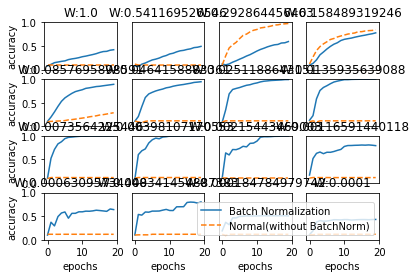

In [21]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()


# 6.4 바른 학습을 위해 

* 참고 Normalization, standarization 과 Regularization 의 차이 

Normalization and standarization are pretty much the same thing and both relate to the issue of feature scaling. If training an algorithm using different features and some of them are off the scale in their magnitude, then the results might be dominated by them instead of all the features. This is a common problem in SVM, for example. I tend to use "normalization" when I map the features into [-1,1] by dividing (i.e. "normalizing") by the largest values in the sample and "standarization" when I convert to z-score (i.e. standard deviations from the mean value of the sample). But I'm not 100% sure if everybody follows the same convention.

Regularization is a technique to avoid overfitting when training machine learning algorithms. If you have an algorithm with enough free parameters you can interpolate with great detail your sample, but examples coming outside the sample might not follow this detail interpolation as it just captured noise or random irregularities in the sample instead of the true trend. Overfitting is avoided by limiting the absolute value of the parameters in the model. This can be done by adding a term to the cost function that imposes a penalty based on the magnitude of the model parameters. If the magnitude is measured in L1 norm this is called "L1 regularization" (and usually results in sparse models), if it is measured in L2 norm this is called "L2 regularization", and so on.